<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/Semana14/AlgoritmoMetropolis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emcee
!pip install corner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import emcee
import corner
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana14/Data/Gaussiano.csv'
file

'/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana14/Data/Gaussiano.csv'

In [4]:
data = pd.read_csv(file,sep=',')
data.keys()

Index(['x'], dtype='object')

In [7]:
X = np.array(data['x'])

In [8]:
def LogPrior(p):
  mu, sigma = p
  if -10.0 < mu < 10.0 and 0.0 < sigma < 20.0:
    return 0.0
  else:
    return -np.inf

In [9]:
def Gaus(p,x):
  mu, sigma = p
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

In [10]:
def Likelihood(p,x):
  return Gaus(p,x)

In [11]:
def JointLikelihood(p,x):
  return +np.sum(np.log(Likelihood(p,x)))

In [13]:
JointLikelihood([3,4],X)

-243.93127881458895

In [14]:
def LogPosterior(p,x):

  LogP = LogPrior(p)
  if not np.isfinite(LogP):
    return -np.inf
  else:
    return LogP + JointLikelihood(p,x)

In [17]:
LogPosterior([0,2],X)

-403.4760860068571

In [29]:
# Paquete
n_walkers, n_params = 10,2
p0 = np.zeros((n_walkers, n_params))
p0[:,0] = 2
p0[:,1] = 2
p0 += np.random.rand(n_walkers, n_params)

In [30]:
sampler = emcee.EnsembleSampler(n_walkers, n_params, LogPosterior, args=(X,))
pos,prob,state = sampler.run_mcmc(p0,10000,progress=True)

100%|██████████| 10000/10000 [00:07<00:00, 1356.32it/s]


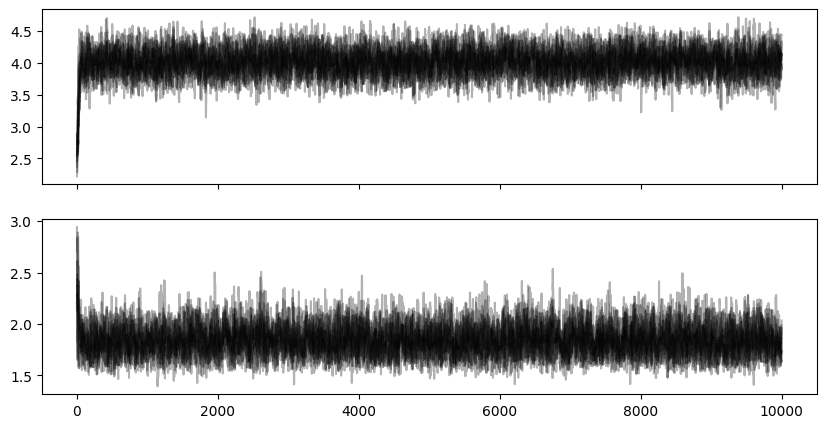

In [26]:
fig, axes = plt.subplots(2, figsize=(10,5), sharex=True)

samples = sampler.get_chain()
labels = ["mu", "sigma"]
for i in range(2):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)

In [32]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
truths = np.percentile(flat_samples, 50, axis=0)
truths

array([4.01101325, 1.82717208])

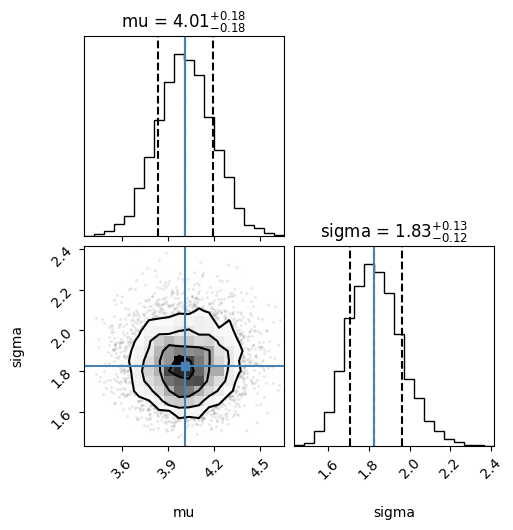

In [34]:
figure = corner.corner(flat_samples, labels=labels, truths=truths, quantiles=[0.16, 0.5, 0.84], show_titles=True)

In [38]:
upperlimits = np.percentile(flat_samples, [2.5,97.5], axis=0)
upperlimits

array([[3.65627747, 1.59690096],
       [4.37135244, 2.11664398]])

In [36]:
0.13/1.83

0.07103825136612021